# Keras Uncertainty Example - Regression

These examples accompany the talk "Uncertainty Quantification in Neural Networks with Keras" at PyData Global 2020.
It is meant to show a complete pipeline of training a model and evaluating its uncertainty using the keras_uncertainty library.

Please make sure that you have keras_uncertainty and keras (not tf.keras) installed before running these code samples. You can install keras_uncertainty with the following command:

    pip install --user git+https://github.com/mvaldenegro/keras-uncertainty.git
    
The first step is to import the necessary modules:

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

import keras_uncertainty
from keras_uncertainty.models import DeepEnsembleRegressor, deep_ensemble_regression_nll_loss

import numpy as np

Using TensorFlow backend.


We now define a simple function to generate data for our training set, including an additive noise term. The training set will be values inside the range [-8, 8], while we also evaluate each model outside of this range in order to test and visualize out of distribution performance.

In [2]:
from math import sin

def toy_dataset(input):
    output = []

    for inp in input:
        out = 2 * sin(0.75 * inp) + np.random.normal(0, 0.1)
        output.append(out)

    return np.array(output)

x_train = np.linspace(-8, 8, 1000)
y_train = toy_dataset(x_train)

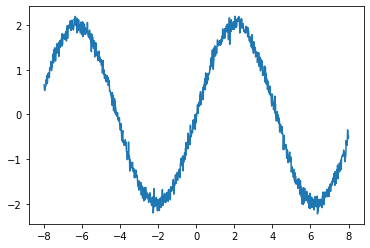

In [3]:
import matplotlib.pyplot as plt

plt.plot(x_train, y_train)
plt.show()

We now define a multi-layer perceptron model to train a deep ensemble of five ensemble members. The model is very simple, with three layers, and two outputs, one for the mean and another for the variance. Note that the mean output uses a linear activation (not constraining the output ranges), and the variance output uses a softplus activation (since variances are always positive).

In [15]:
def mlp_model():
    inp = Input(shape=(1,))
    x = Dense(10, activation="relu")(inp)
    x = Dense(20, activation="relu")(x)
    x = Dense(30, activation="relu")(x)
    mean = Dense(1, activation="linear")(x)
    var = Dense(1, activation="softplus")(x)

    train_model = Model(inp, mean)
    pred_model = Model(inp, [mean, var])

    train_model.compile(loss=deep_ensemble_regression_nll_loss(var), optimizer="adam")

    return train_model, pred_model 

model = DeepEnsembleRegressor(mlp_model, 5)
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
1000/1000 [==============================] - 0s 368us/step - loss: 1.1523
Epoch 2/200
1000/1000 [==============================] - 0s 63us/step - loss: 0.9211
Epoch 3/200
1000/1000 [==============================] - 0s 60us/step - loss: 0.8319
Epoch 4/200
1000/1000 [==============================] - 0s 94us/step - loss: 0.7412
Epoch 5/200
1000/1000 [==============================] - 0s 127us/step - loss: 0.6292 0s - loss: 0.638
Epoch 6/200
1000/1000 [==============================] - 0s 112us/step - loss: 0.4865
Epoch 7/200
1000/1000 [==============================] - 0s 90us/step - loss: 0.3365
Epoch 8/200
1000/1000 [==============================] - 0s 79us/step - loss: 0.1928
Epoch 9/200
1000/1000 [==============================] - 0s 81us/step - loss: 0.0463
Epoch 10/200
1000/1000 [==============================] - 0s 85us/step - loss: -0.0575
Epoch 11/200
1000/1000 [==============================] - 0s 119us/step - loss: -0.1049
Epoch 12/200
1000/1000 [================

1000/1000 [==============================] - 0s 57us/step - loss: -1.7623
Epoch 188/200
1000/1000 [==============================] - 0s 50us/step - loss: -1.7695
Epoch 189/200
1000/1000 [==============================] - 0s 55us/step - loss: -1.7647
Epoch 190/200
1000/1000 [==============================] - 0s 46us/step - loss: -1.7835
Epoch 191/200
1000/1000 [==============================] - 0s 52us/step - loss: -1.7831
Epoch 192/200
1000/1000 [==============================] - 0s 45us/step - loss: -1.7665
Epoch 193/200
1000/1000 [==============================] - 0s 45us/step - loss: -1.7680
Epoch 194/200
1000/1000 [==============================] - 0s 43us/step - loss: -1.7551
Epoch 195/200
1000/1000 [==============================] - 0s 48us/step - loss: -1.7501
Epoch 196/200
1000/1000 [==============================] - 0s 50us/step - loss: -1.7482
Epoch 197/200
1000/1000 [==============================] - 0s 52us/step - loss: -1.7302
Epoch 198/200
1000/1000 [=====================

1000/1000 [==============================] - 0s 51us/step - loss: -1.7599
Epoch 175/200
1000/1000 [==============================] - 0s 58us/step - loss: -1.7734
Epoch 176/200
1000/1000 [==============================] - 0s 61us/step - loss: -1.7310
Epoch 177/200
1000/1000 [==============================] - 0s 55us/step - loss: -1.7353
Epoch 178/200
1000/1000 [==============================] - 0s 81us/step - loss: -1.7301
Epoch 179/200
1000/1000 [==============================] - 0s 60us/step - loss: -1.6827
Epoch 180/200
1000/1000 [==============================] - 0s 63us/step - loss: -1.7561
Epoch 181/200
1000/1000 [==============================] - 0s 64us/step - loss: -1.7207
Epoch 182/200
1000/1000 [==============================] - 0s 56us/step - loss: -1.7261
Epoch 183/200
1000/1000 [==============================] - 0s 51us/step - loss: -1.7153
Epoch 184/200
1000/1000 [==============================] - 0s 60us/step - loss: -1.7610
Epoch 185/200
1000/1000 [=====================

1000/1000 [==============================] - 0s 114us/step - loss: -1.6452
Epoch 162/200
1000/1000 [==============================] - 0s 108us/step - loss: -1.6826
Epoch 163/200
1000/1000 [==============================] - 0s 107us/step - loss: -1.7353
Epoch 164/200
1000/1000 [==============================] - 0s 101us/step - loss: -1.6847
Epoch 165/200
1000/1000 [==============================] - 0s 89us/step - loss: -1.6782
Epoch 166/200
1000/1000 [==============================] - 0s 122us/step - loss: -1.7064
Epoch 167/200
1000/1000 [==============================] - 0s 66us/step - loss: -1.7122
Epoch 168/200
1000/1000 [==============================] - 0s 107us/step - loss: -1.6800
Epoch 169/200
1000/1000 [==============================] - 0s 70us/step - loss: -1.7037
Epoch 170/200
1000/1000 [==============================] - 0s 74us/step - loss: -1.7241
Epoch 171/200
1000/1000 [==============================] - 0s 93us/step - loss: -1.7208
Epoch 172/200
1000/1000 [===============

Epoch 55/200
1000/1000 [==============================] - 0s 90us/step - loss: -0.9406
Epoch 56/200
1000/1000 [==============================] - 0s 85us/step - loss: -0.9720
Epoch 57/200
1000/1000 [==============================] - 0s 83us/step - loss: -0.9718
Epoch 58/200
1000/1000 [==============================] - 0s 104us/step - loss: -0.9990
Epoch 59/200
1000/1000 [==============================] - 0s 131us/step - loss: -1.0318
Epoch 60/200
1000/1000 [==============================] - 0s 101us/step - loss: -1.0266
Epoch 61/200
1000/1000 [==============================] - 0s 105us/step - loss: -1.0412
Epoch 62/200
1000/1000 [==============================] - 0s 90us/step - loss: -1.0481
Epoch 63/200
1000/1000 [==============================] - 0s 87us/step - loss: -1.0369
Epoch 64/200
1000/1000 [==============================] - 0s 125us/step - loss: -1.0389
Epoch 65/200
1000/1000 [==============================] - 0s 94us/step - loss: -1.0643
Epoch 66/200
1000/1000 [==============

1000/1000 [==============================] - 0s 76us/step - loss: -1.2095
Epoch 42/200
1000/1000 [==============================] - 0s 66us/step - loss: -1.2401
Epoch 43/200
1000/1000 [==============================] - 0s 57us/step - loss: -1.2324
Epoch 44/200
1000/1000 [==============================] - 0s 71us/step - loss: -1.3035
Epoch 45/200
1000/1000 [==============================] - 0s 67us/step - loss: -1.3024
Epoch 46/200
1000/1000 [==============================] - 0s 86us/step - loss: -1.3163
Epoch 47/200
1000/1000 [==============================] - 0s 96us/step - loss: -1.3547
Epoch 48/200
1000/1000 [==============================] - 0s 87us/step - loss: -1.3387
Epoch 49/200
1000/1000 [==============================] - 0s 83us/step - loss: -1.3557
Epoch 50/200
1000/1000 [==============================] - 0s 81us/step - loss: -1.3963
Epoch 51/200
1000/1000 [==============================] - 0s 82us/step - loss: -1.4092
Epoch 52/200
1000/1000 [==============================] 

After training the deep ensemble regressor, we can now plot the model predictions. Making a prediction here produces a mean and standard deviation for each input value, so we make confidence interval plots, with varying values of sigma.

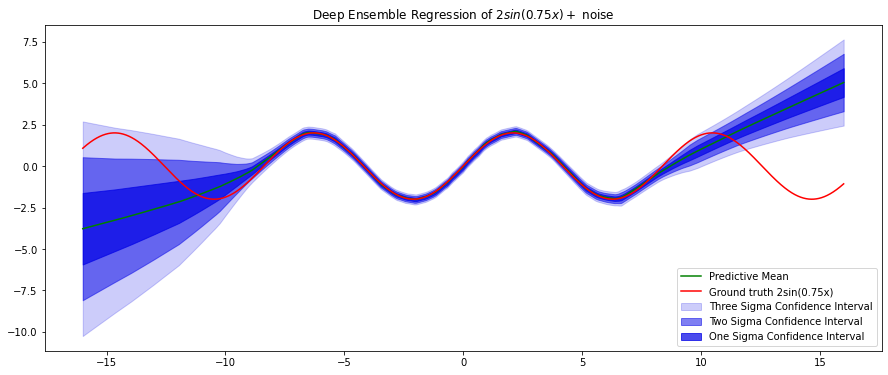

In [17]:
x = np.linspace(-16.0, 16.0, 3000)
y_pred_mean, y_pred_std = model.predict(x)

y_pred_mean = y_pred_mean.reshape((-1,))
y_pred_std = y_pred_std.reshape((-1,))

y_pred_up_1 = y_pred_mean + y_pred_std
y_pred_down_1 = y_pred_mean - y_pred_std

y_pred_up_2 = y_pred_mean + 2.0 * y_pred_std
y_pred_down_2 = y_pred_mean - 2.0 * y_pred_std

y_pred_up_3 = y_pred_mean + 3.0 * y_pred_std
y_pred_down_3 = y_pred_mean - 3.0 * y_pred_std

plt.figure(figsize=(15, 6))

plt.plot(x, y_pred_mean, color="green", label="Predictive Mean")
plt.plot(x, 2 * np.sin(0.75 * x), color='red', label="Ground truth 2sin(0.75x)")

plt.fill_between(x, y_pred_down_3, y_pred_up_3, color=(0, 0, 0.9, 0.2), label="Three Sigma Confidence Interval")
plt.fill_between(x, y_pred_down_2, y_pred_up_2, color=(0, 0, 0.9, 0.5), label="Two Sigma Confidence Interval")
plt.fill_between(x, y_pred_down_1, y_pred_up_1, color=(0, 0, 0.9, 0.7), label="One Sigma Confidence Interval")
        
plt.legend(loc="lower right")
plt.title("Deep Ensemble Regression of $2sin(0.75x) +$ noise")

plt.savefig("ensemble-regression.pdf")

For comparison, we now train a similar model but using dropconnect instead of a deep ensemble. For this purpose we use variations of standard Keras layers, in this case DropConnectDense, which is a replacement for a Dense layer that implements dropconnect. This model only requires one output as uncertainty quantification is performed in the later cell.

In [4]:
from keras.models import Sequential
from keras_uncertainty.layers import DropConnectDense

model_two = Sequential([
    DropConnectDense(10, activation="relu", input_shape=(1,), prob=0.1),
    DropConnectDense(20, activation="relu", prob=0.1),
    DropConnectDense(30, activation="relu", prob=0.1),
    DropConnectDense(1, activation="linear", prob=0.1),    
])

model_two.compile(loss="mse", optimizer="adam", metrics=["mae"])
model_two.fit(x_train, y_train, epochs=300)


Epoch 1/300
1000/1000 [==============================] - 0s 304us/step - loss: 2.6837 - mae: 1.4529
Epoch 2/300
1000/1000 [==============================] - 0s 59us/step - loss: 2.0519 - mae: 1.2788
Epoch 3/300
1000/1000 [==============================] - 0s 95us/step - loss: 1.9529 - mae: 1.2239
Epoch 4/300
1000/1000 [==============================] - 0s 59us/step - loss: 1.8703 - mae: 1.1970
Epoch 5/300
1000/1000 [==============================] - 0s 98us/step - loss: 1.8043 - mae: 1.1624
Epoch 6/300
1000/1000 [==============================] - 0s 74us/step - loss: 1.8080 - mae: 1.1674
Epoch 7/300
1000/1000 [==============================] - 0s 55us/step - loss: 1.7460 - mae: 1.1417
Epoch 8/300
1000/1000 [==============================] - 0s 57us/step - loss: 1.6518 - mae: 1.1117
Epoch 9/300
1000/1000 [==============================] - 0s 82us/step - loss: 1.6472 - mae: 1.1112
Epoch 10/300
1000/1000 [==============================] - 0s 71us/step - loss: 1.6661 - mae: 1.1184
Epoch 1

1000/1000 [==============================] - 0s 45us/step - loss: 0.2793 - mae: 0.4104
Epoch 162/300
1000/1000 [==============================] - 0s 45us/step - loss: 0.2501 - mae: 0.3923
Epoch 163/300
1000/1000 [==============================] - 0s 55us/step - loss: 0.3106 - mae: 0.4403
Epoch 164/300
1000/1000 [==============================] - 0s 35us/step - loss: 0.2386 - mae: 0.3862
Epoch 165/300
1000/1000 [==============================] - 0s 41us/step - loss: 0.2913 - mae: 0.4131
Epoch 166/300
1000/1000 [==============================] - 0s 45us/step - loss: 0.2709 - mae: 0.3997
Epoch 167/300
1000/1000 [==============================] - 0s 45us/step - loss: 0.2544 - mae: 0.4019
Epoch 168/300
1000/1000 [==============================] - 0s 34us/step - loss: 0.2652 - mae: 0.3966
Epoch 169/300
1000/1000 [==============================] - 0s 52us/step - loss: 0.3232 - mae: 0.4326
Epoch 170/300
1000/1000 [==============================] - 0s 34us/step - loss: 0.2701 - mae: 0.4067
Epoc

After training this model, we can get uncertainty estimates by first making an instance of MCDropoutRegressor, which enables the stochastic functionality of dropout and dropconnect inside the model. Then we can make stochastic predictions by calling the predict method, which returns a mean and standard deviation. We plot these predictions in the same way as before.

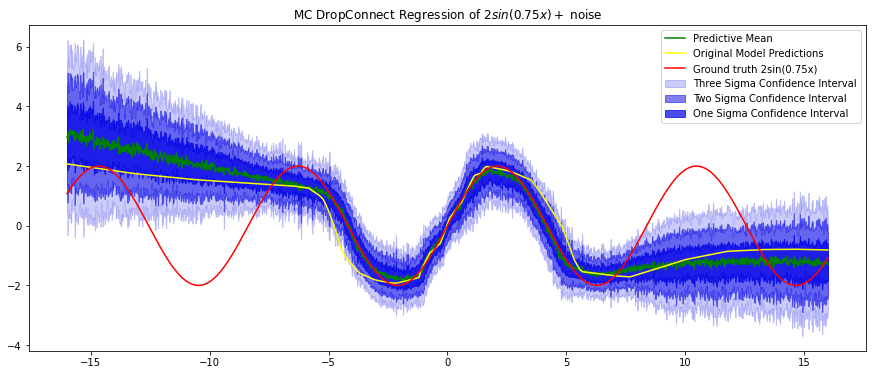

In [13]:
from keras_uncertainty.models import MCDropoutRegressor
mc_model = MCDropoutRegressor(model_two)

x = np.linspace(-16.0, 16.0, 3000)
y_pred_two = model_two.predict(x)

y_pred_mean, y_pred_std = mc_model.predict(np.expand_dims(x, axis=-1), num_samples=50, batch_size=2)

y_pred_mean = y_pred_mean.reshape((-1,))
y_pred_std = y_pred_std.reshape((-1,))

y_pred_up_1 = y_pred_mean + y_pred_std
y_pred_down_1 = y_pred_mean - y_pred_std

y_pred_up_2 = y_pred_mean + 2.0 * y_pred_std
y_pred_down_2 = y_pred_mean - 2.0 * y_pred_std

y_pred_up_3 = y_pred_mean + 3.0 * y_pred_std
y_pred_down_3 = y_pred_mean - 3.0 * y_pred_std

plt.figure(figsize=(15, 6))

plt.plot(x, y_pred_mean, color="green", label="Predictive Mean")

plt.plot(x, y_pred_two, color="yellow", label="Original Model Predictions")
plt.plot(x, 2 * np.sin(0.75 * x), color='red', label="Ground truth 2sin(0.75x)")

plt.fill_between(x, y_pred_down_3, y_pred_up_3, color=(0, 0, 0.9, 0.2), label="Three Sigma Confidence Interval")
plt.fill_between(x, y_pred_down_2, y_pred_up_2, color=(0, 0, 0.9, 0.5), label="Two Sigma Confidence Interval")
plt.fill_between(x, y_pred_down_1, y_pred_up_1, color=(0, 0, 0.9, 0.7), label="One Sigma Confidence Interval")
        
plt.legend(loc="upper right")
plt.title("MC DropConnect Regression of $2sin(0.75x) +$ noise")

You can see that both methods produce very different uncertainty, dropconnect predictions are noisy while ensemble predictions are much more smooth. Both methods produce increasing variance (larger uncertainty) outside of the training set (the range [-8, 8]), which indicates that the model is extrapolating and its predictions are likely to be incorrect.